**Practica 1 de laboratorio**

*Formula del área de la elipse*
$$A(a, b) = \frac{a}{2} \frac{b}{2} \pi $$

*Formula de la propagación de errores*

$$\sigma_A = \bigg[ \bigg( \frac{dA}{da} \Bigg|_{a_0,\space b_0} \sigma_a \bigg)^2 + \bigg( \frac{dA}{db} \Bigg|_{a_0, \space b_0} \sigma_b \bigg)^2 \bigg]^{\frac{1}{2}}
$$
$$ \sigma_A = \bigg[ \bigg( \frac{1}{4} b_0 \pi \bigg)^2\sigma_b + \bigg( \frac{1}{4} a_0 \pi \bigg)^2\sigma_a \bigg]^{\frac{1}{2}}

In [293]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('pr1.mplstyle')

In [294]:
df = pd.read_csv('leaves.csv')

cA = df[df['class'] == 'A']
cB = df[df['class'] == 'B']
cC = df[df['class'] == 'C']
cD = df[df['class'] == 'D']
cE = df[df['class'] == 'E']

print(cA)

  class  id    weight  length  width         area
0     A   1  0.470000      66     29  1503.252085
1     A   2  0.456667      59     32  1482.831732
2     A   3  0.300000      63     25  1237.002107
3     A   4  0.236667      53     23   957.400361
4     A   5  0.370000      58     33  1503.252085


**Punto 1** 

***Plot masa vs largo, ancho y área***

Regresión lineal para cada tipo de hoja y una general

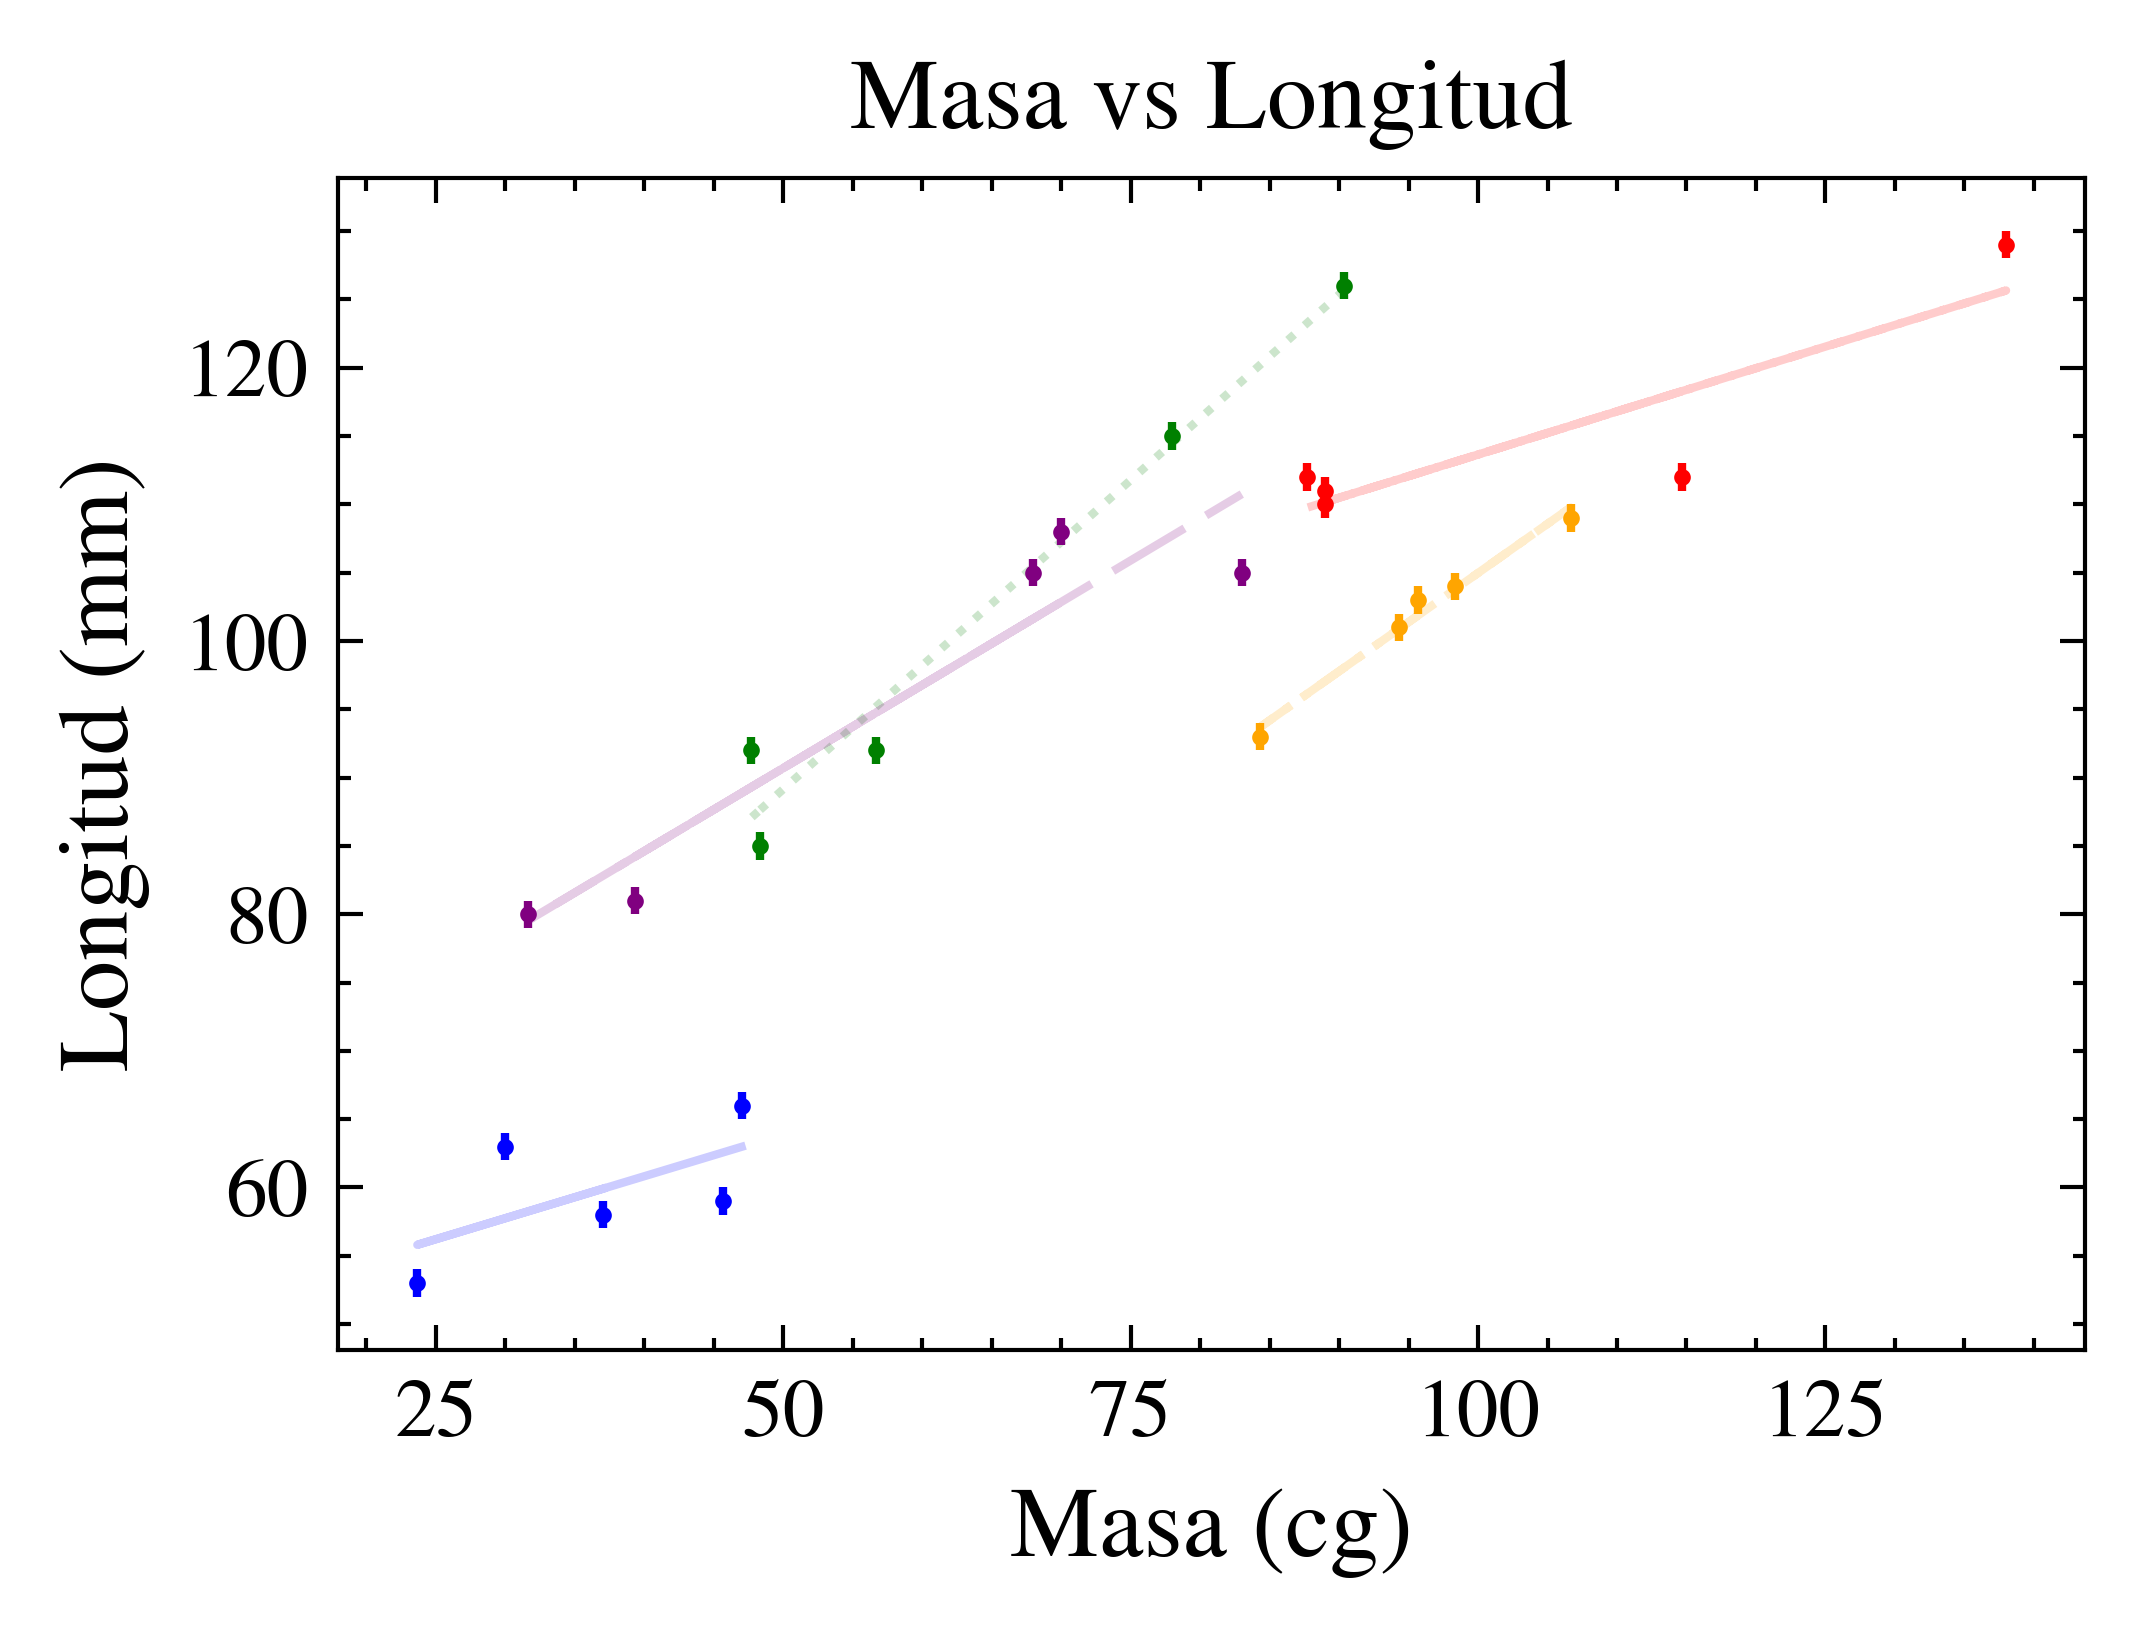

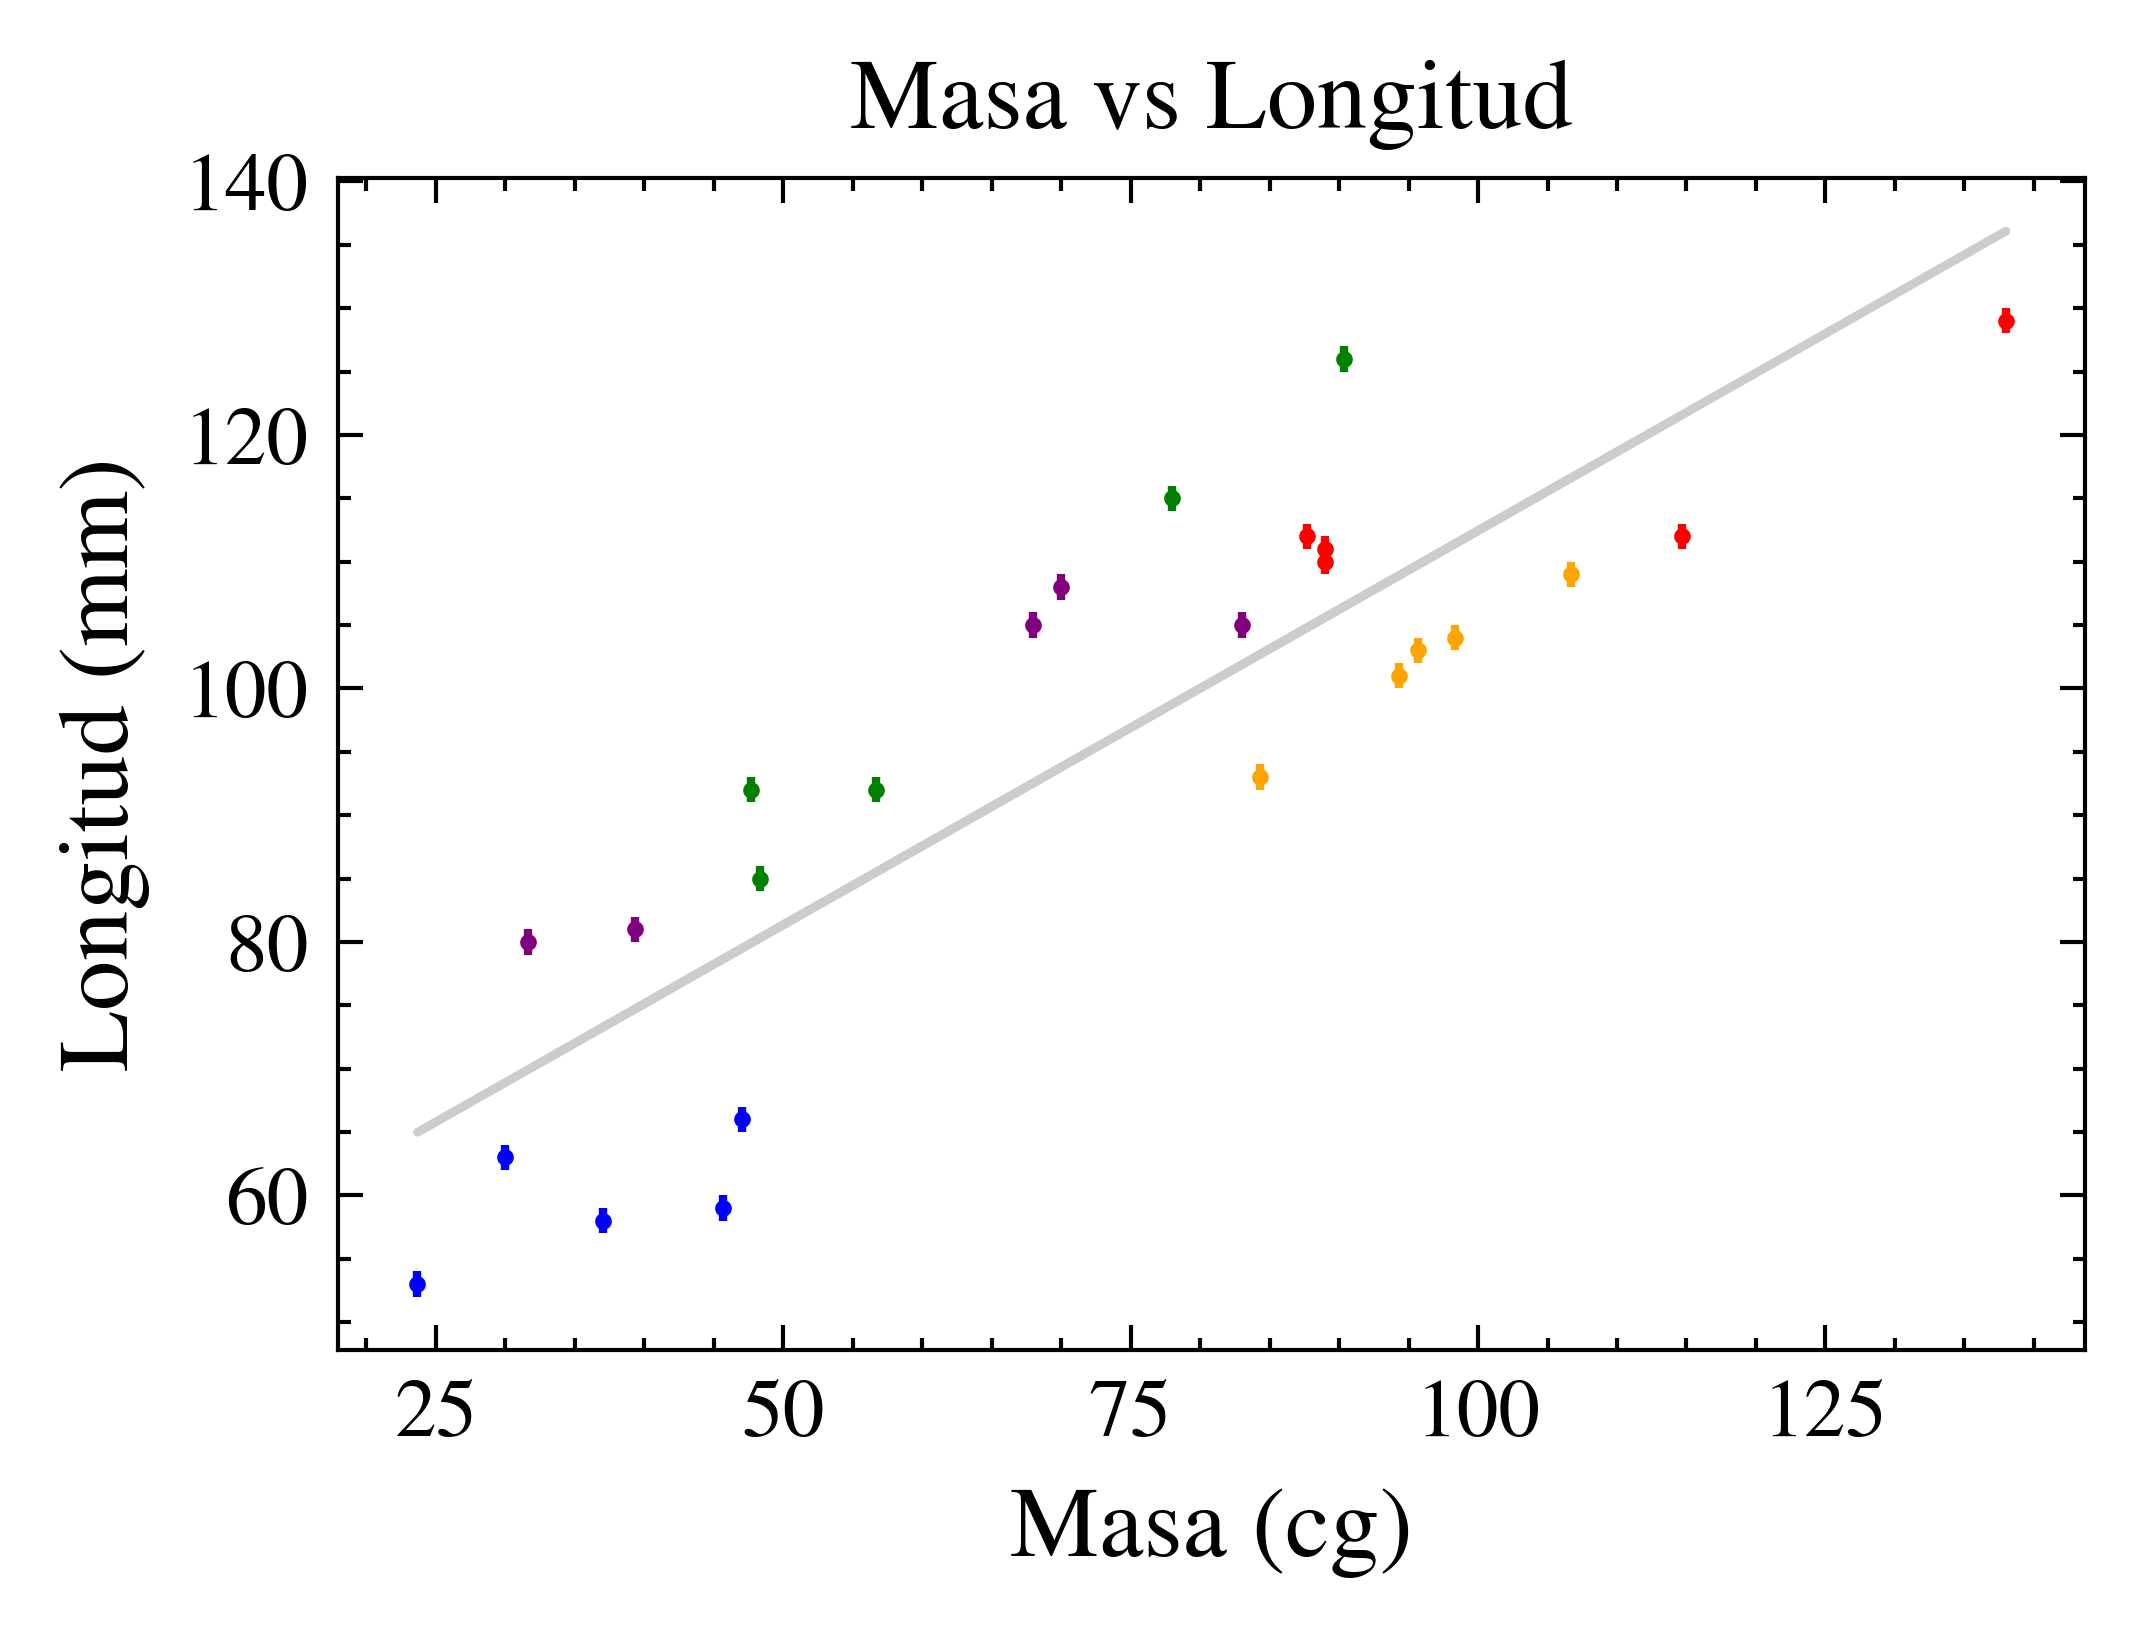

In [295]:
#plot the weight vs lenght of the cA
diameter_points = 1
tol = 1
clases = [(cA, 'Class A', 'blue'), (cB, 'Class B','green'), (cC, 'Class C', 'red'), (cD, 'Class D', 'orange'), (cE, 'Class E', 'purple')]
for clase in clases:
    plt.errorbar(clase[0]['weight']*100, clase[0]['length'], xerr=0, yerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)
    regression_coeffs = np.polyfit(clase[0]['weight']*100, clase[0]['length'], 1)
    regression_line = np.polyval(regression_coeffs, clase[0]['weight']*100)
    plt.plot(clase[0]['weight']*100, regression_line, label='Linear Regression', alpha=0.2, color=clase[2])
plt.xlabel('Masa (cg)')
plt.ylabel('Longitud (mm)')
plt.title('Masa vs Longitud')
plt.show()

#plot only one regression
for clase in clases:
    plt.errorbar(clase[0]['weight']*100, clase[0]['length'], xerr=0, yerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)
regression_coeffs = np.polyfit(df['weight']*100, df['length'], 1)
regression_line = np.polyval(regression_coeffs, df['weight']*100)
plt.plot(df['weight']*100, regression_line, label='Linear Regression', alpha=0.2, color='black')
plt.xlabel('Masa (cg)')
plt.ylabel('Longitud (mm)')
plt.title('Masa vs Longitud')
plt.show()



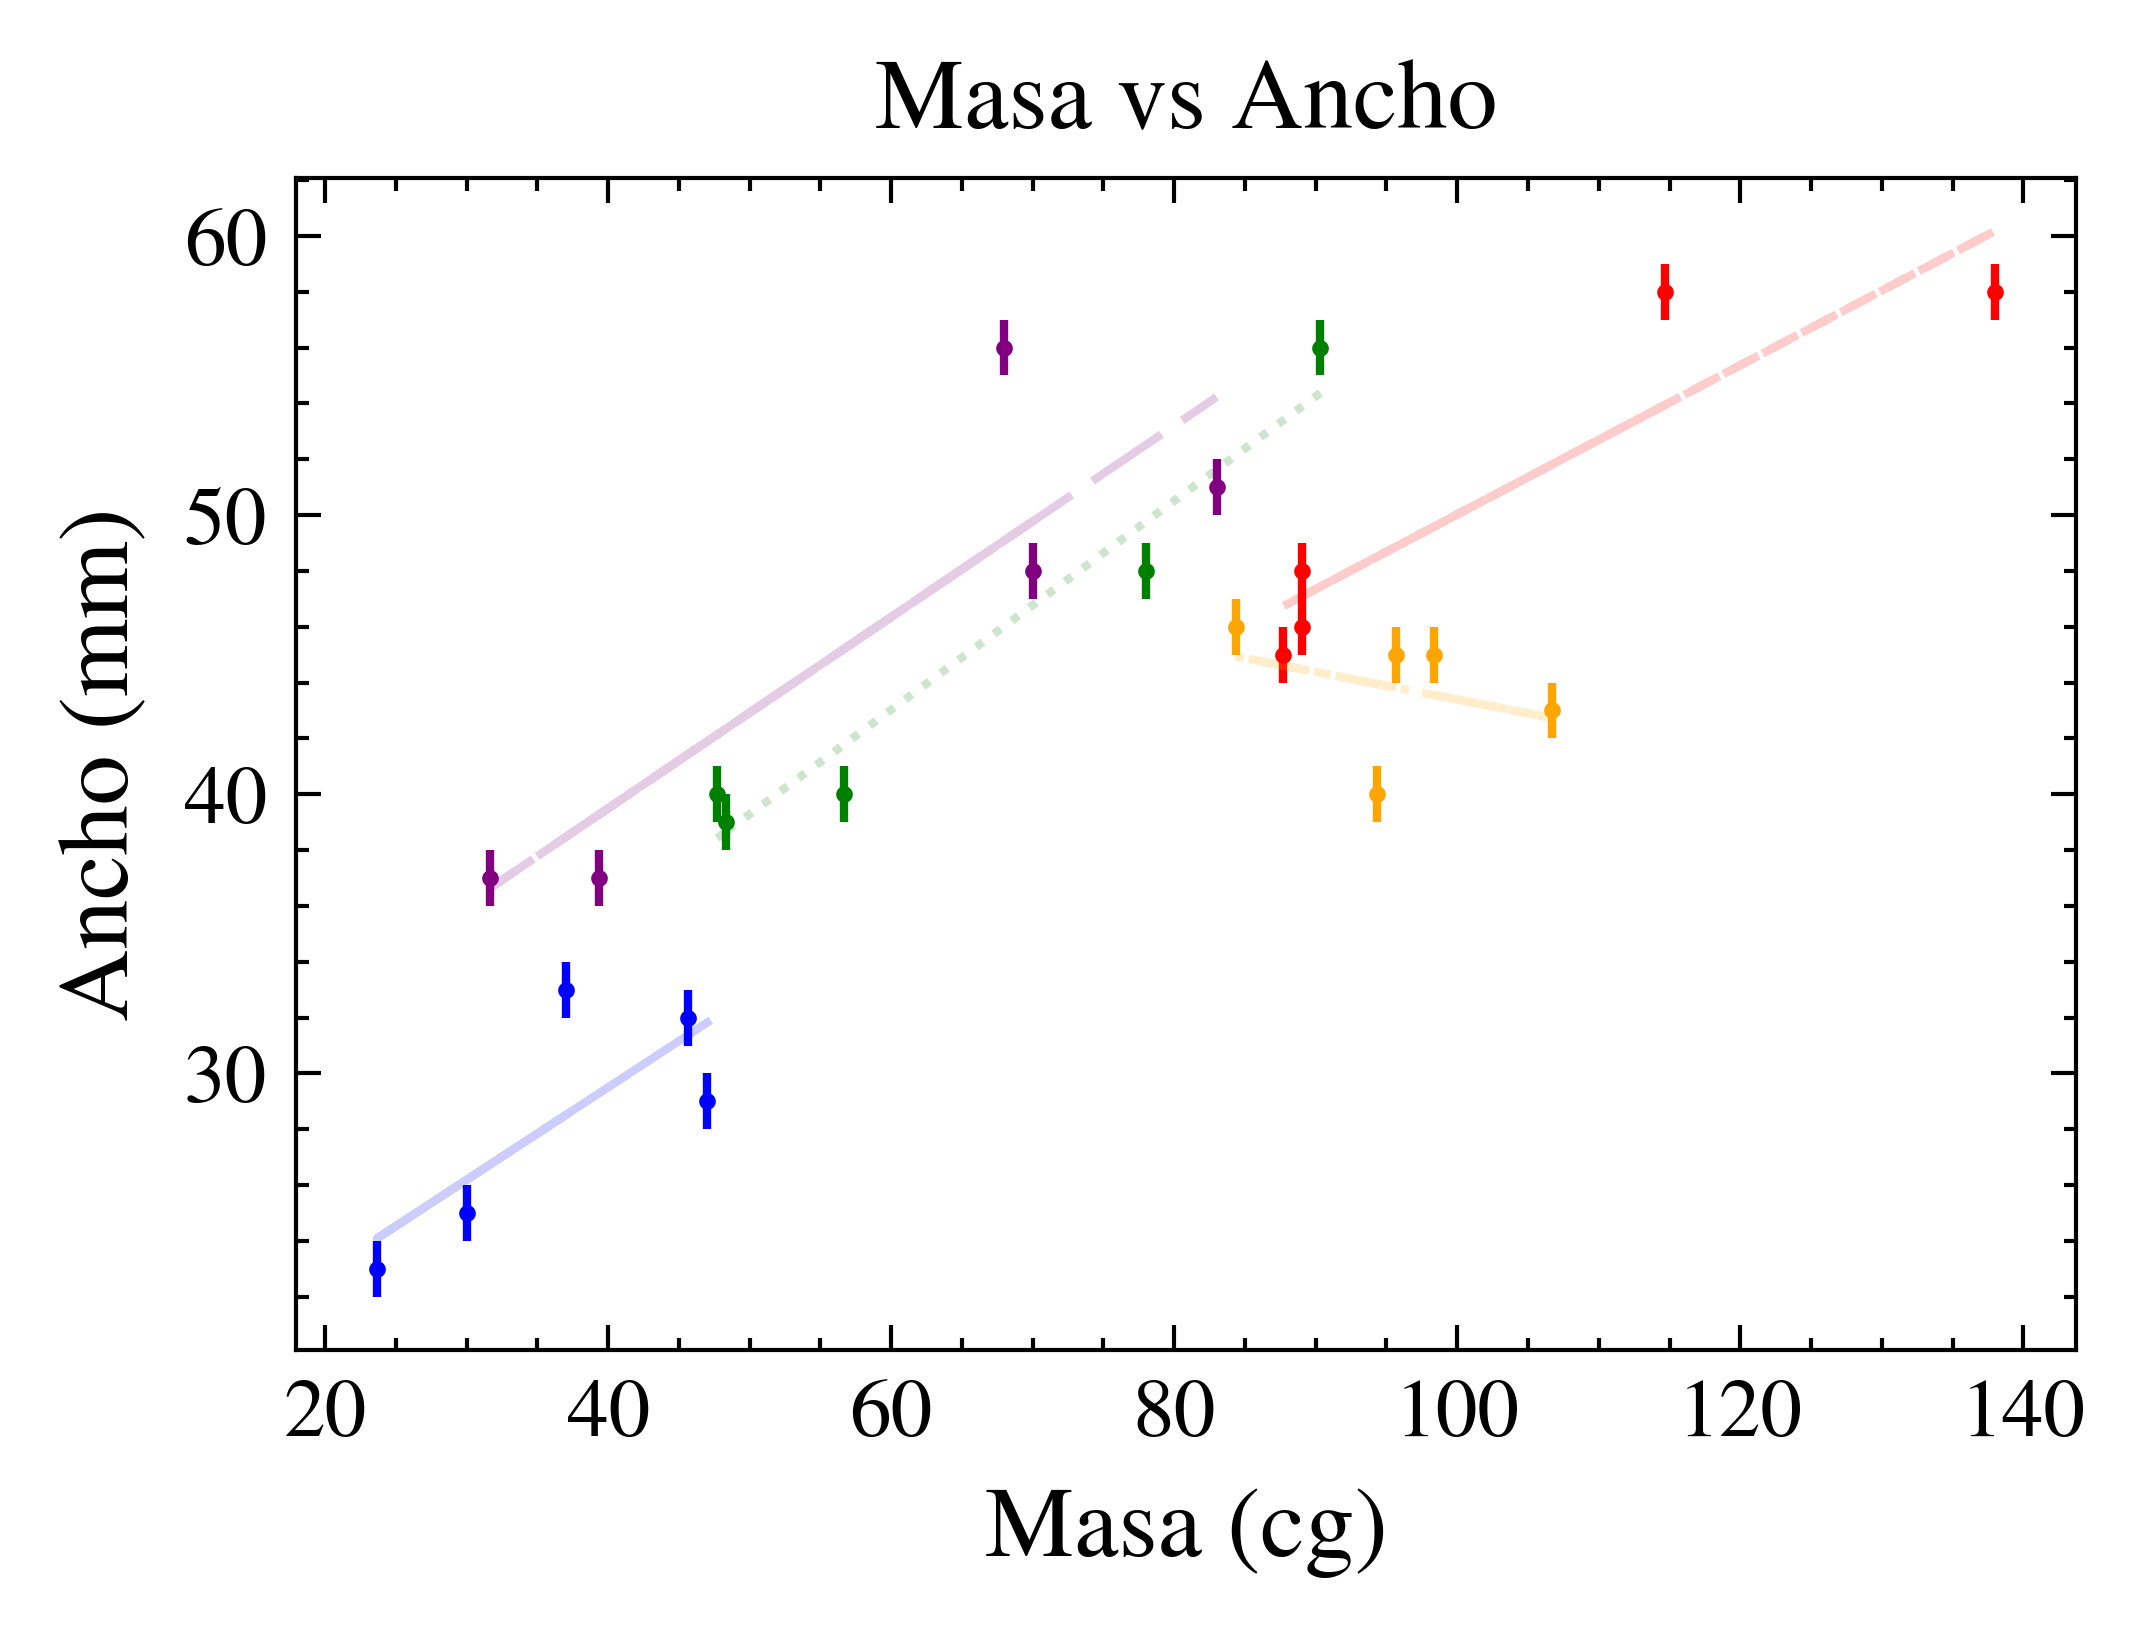

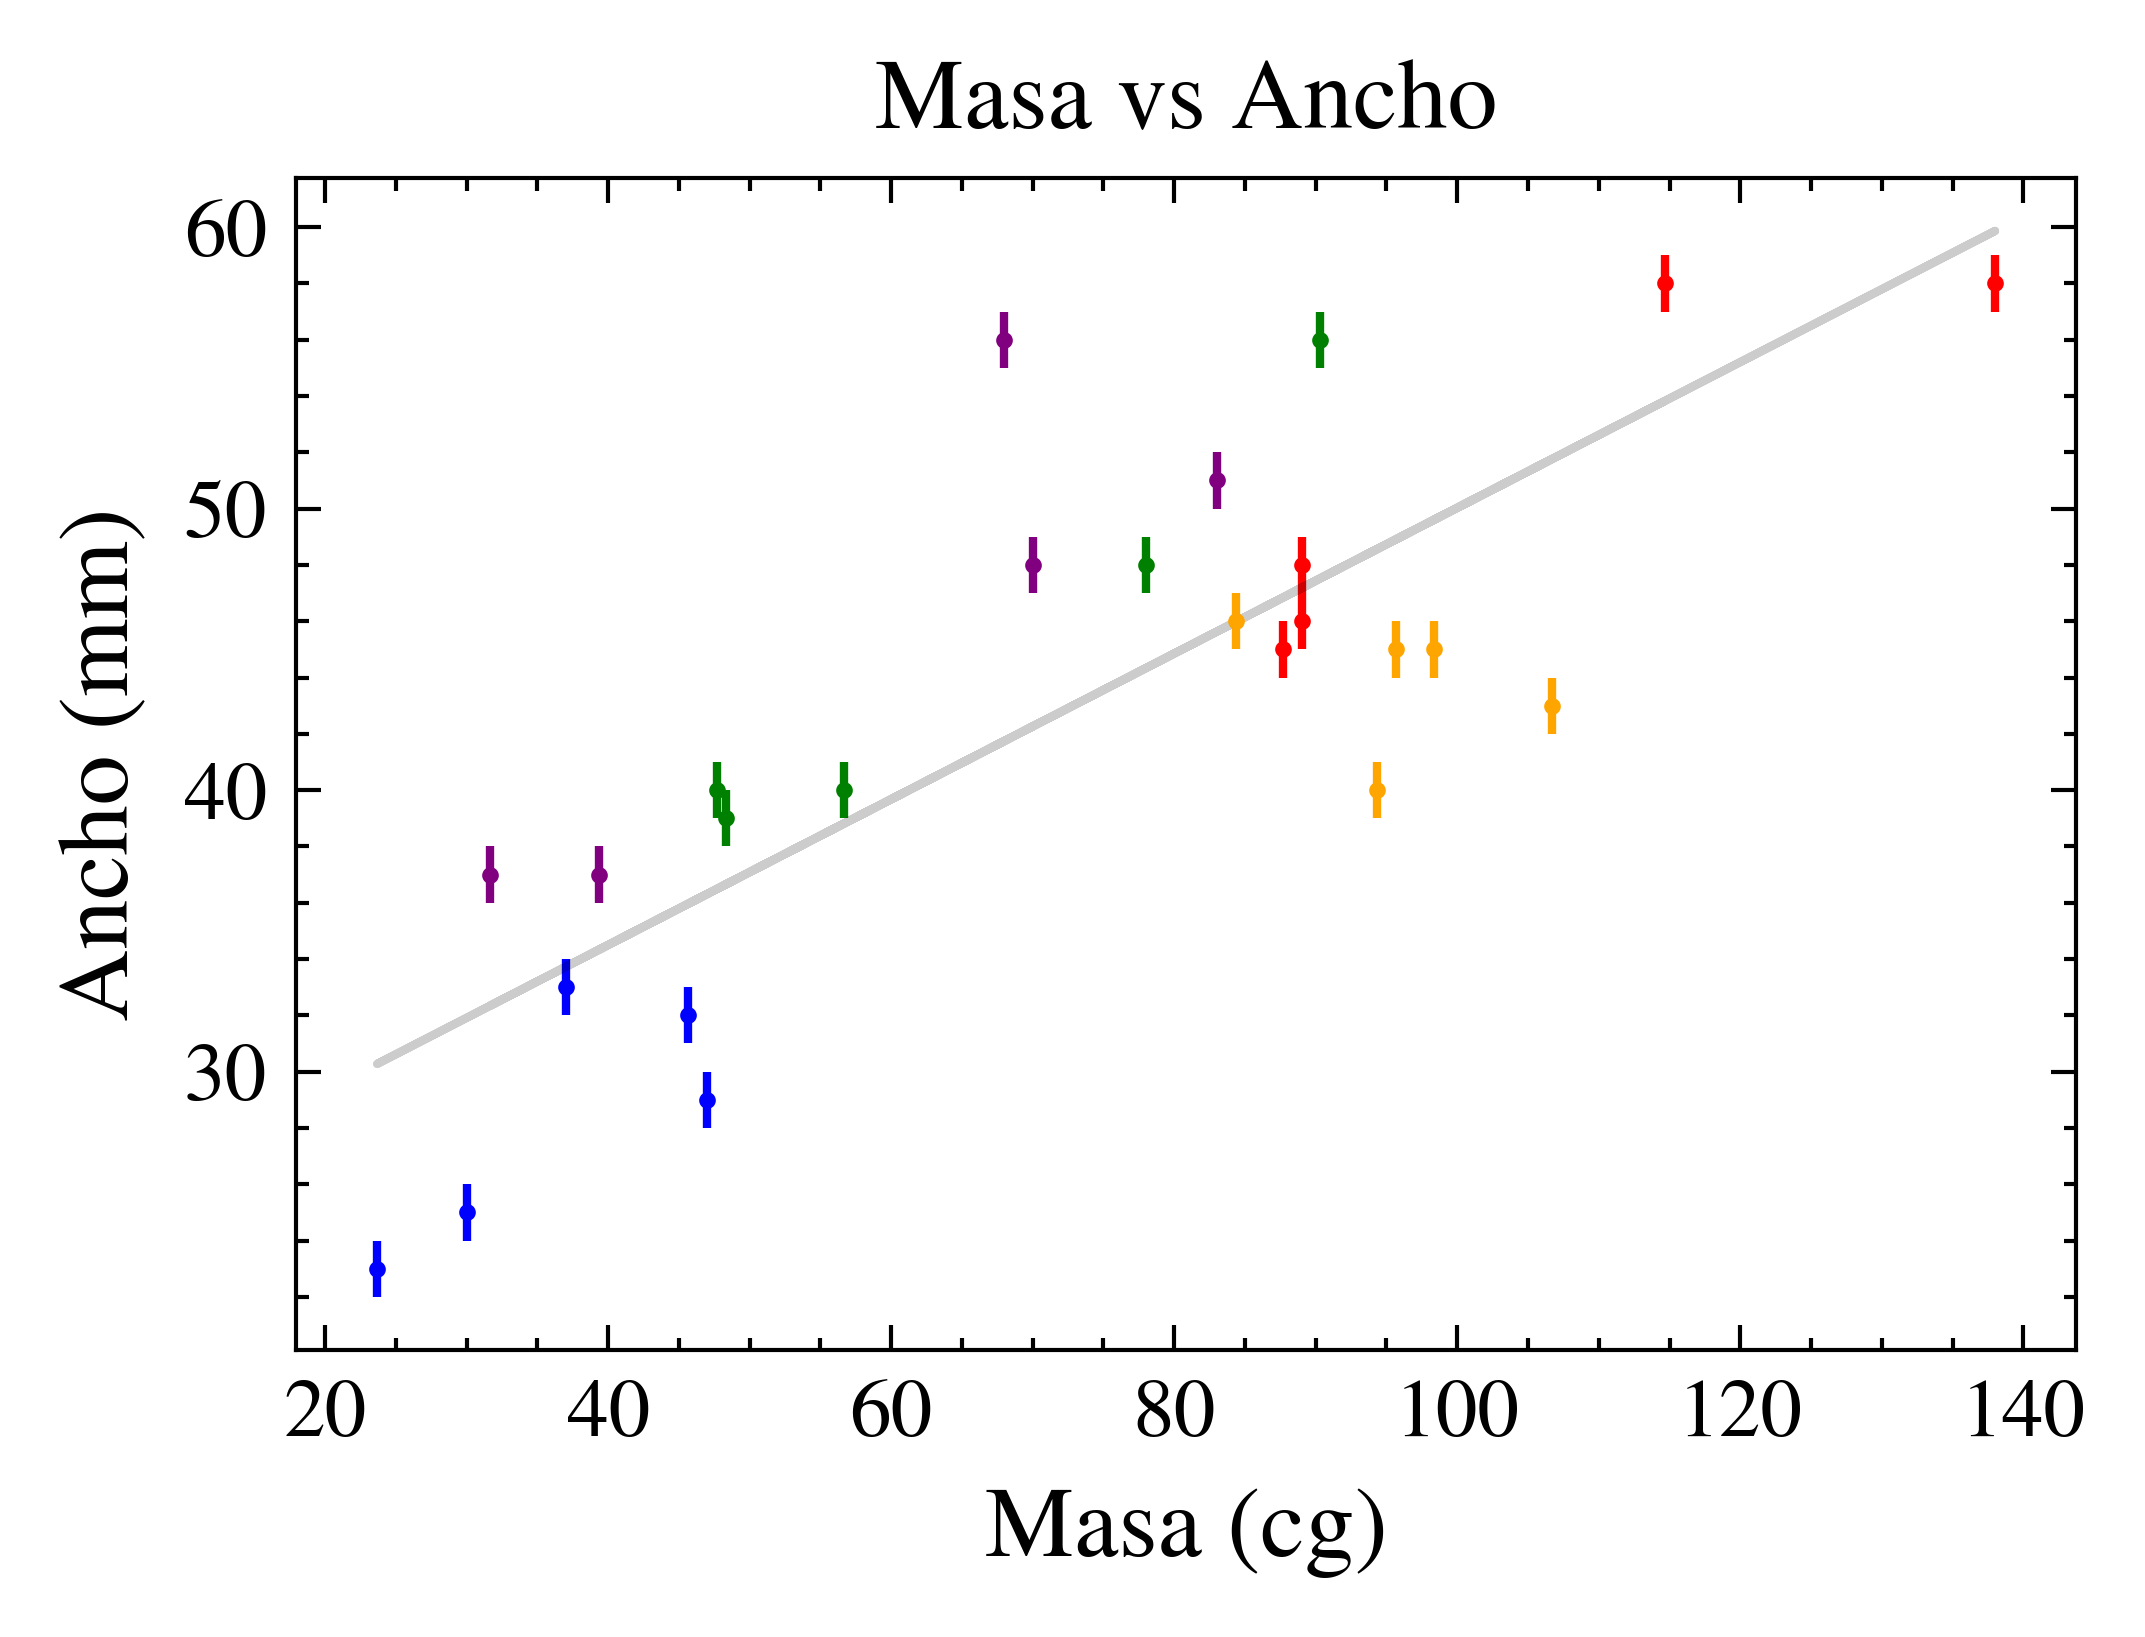

In [296]:
#plot the weight vs width of the cA
# diameter_points = 1
# tol = 1
# clases = [(cA, 'Class A', 'blue'), (cB, 'Class B','green'), (cC, 'Class C', 'red'), (cD, 'Class D', 'orange'), (cE, 'Class E', 'purple')]
for clase in clases:
    plt.errorbar(clase[0]['weight']*100, clase[0]['width'], xerr=0, yerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)
    regression_coeffs = np.polyfit(clase[0]['weight']*100, clase[0]['width'], 1)
    regression_line = np.polyval(regression_coeffs, clase[0]['weight']*100)
    plt.plot(clase[0]['weight']*100, regression_line, label='Linear Regression', alpha=0.2, color=clase[2])
plt.xlabel('Masa (cg)')
plt.ylabel('Ancho (mm)')
plt.title('Masa vs Ancho')
plt.show()

#plot only one regression
for clase in clases:
    plt.errorbar(clase[0]['weight']*100, clase[0]['width'], xerr=0, yerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)
regression_coeffs = np.polyfit(df['weight']*100, df['width'], 1)
regression_line = np.polyval(regression_coeffs, df['weight']*100)
plt.plot(df['weight']*100, regression_line, label='Linear Regression', alpha=0.2, color='black')
plt.xlabel('Masa (cg)')
plt.ylabel('Ancho (mm)')
plt.title('Masa vs Ancho')
plt.show()

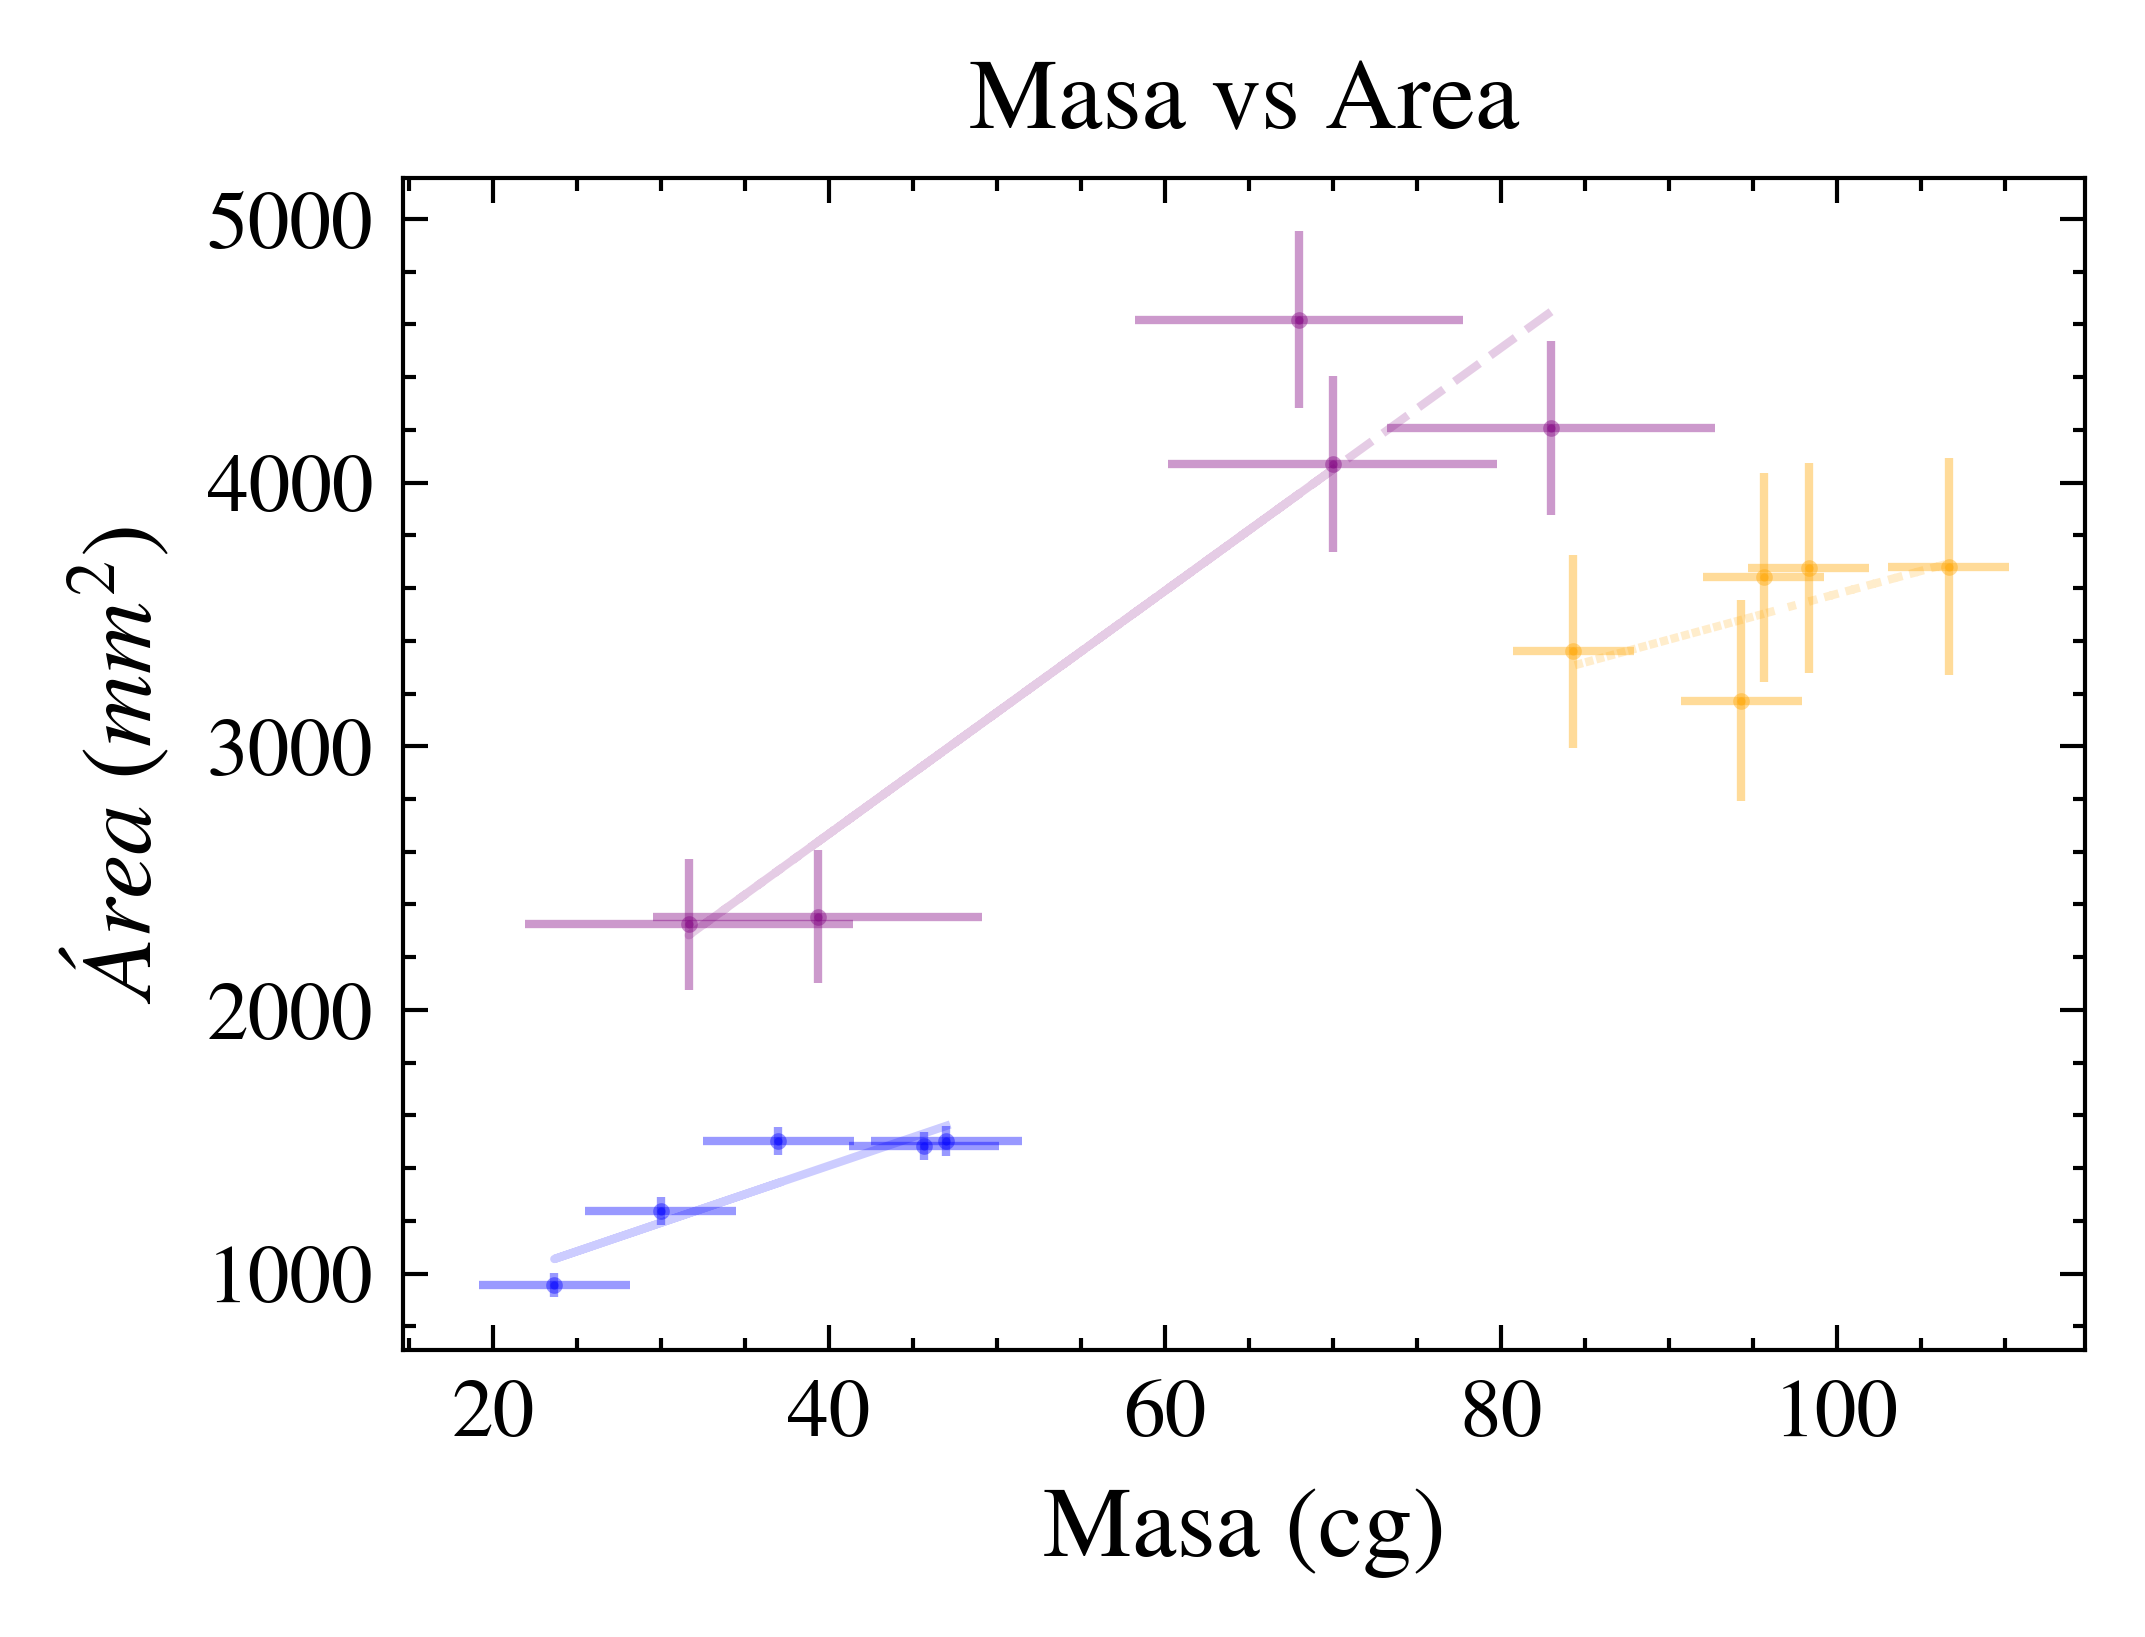

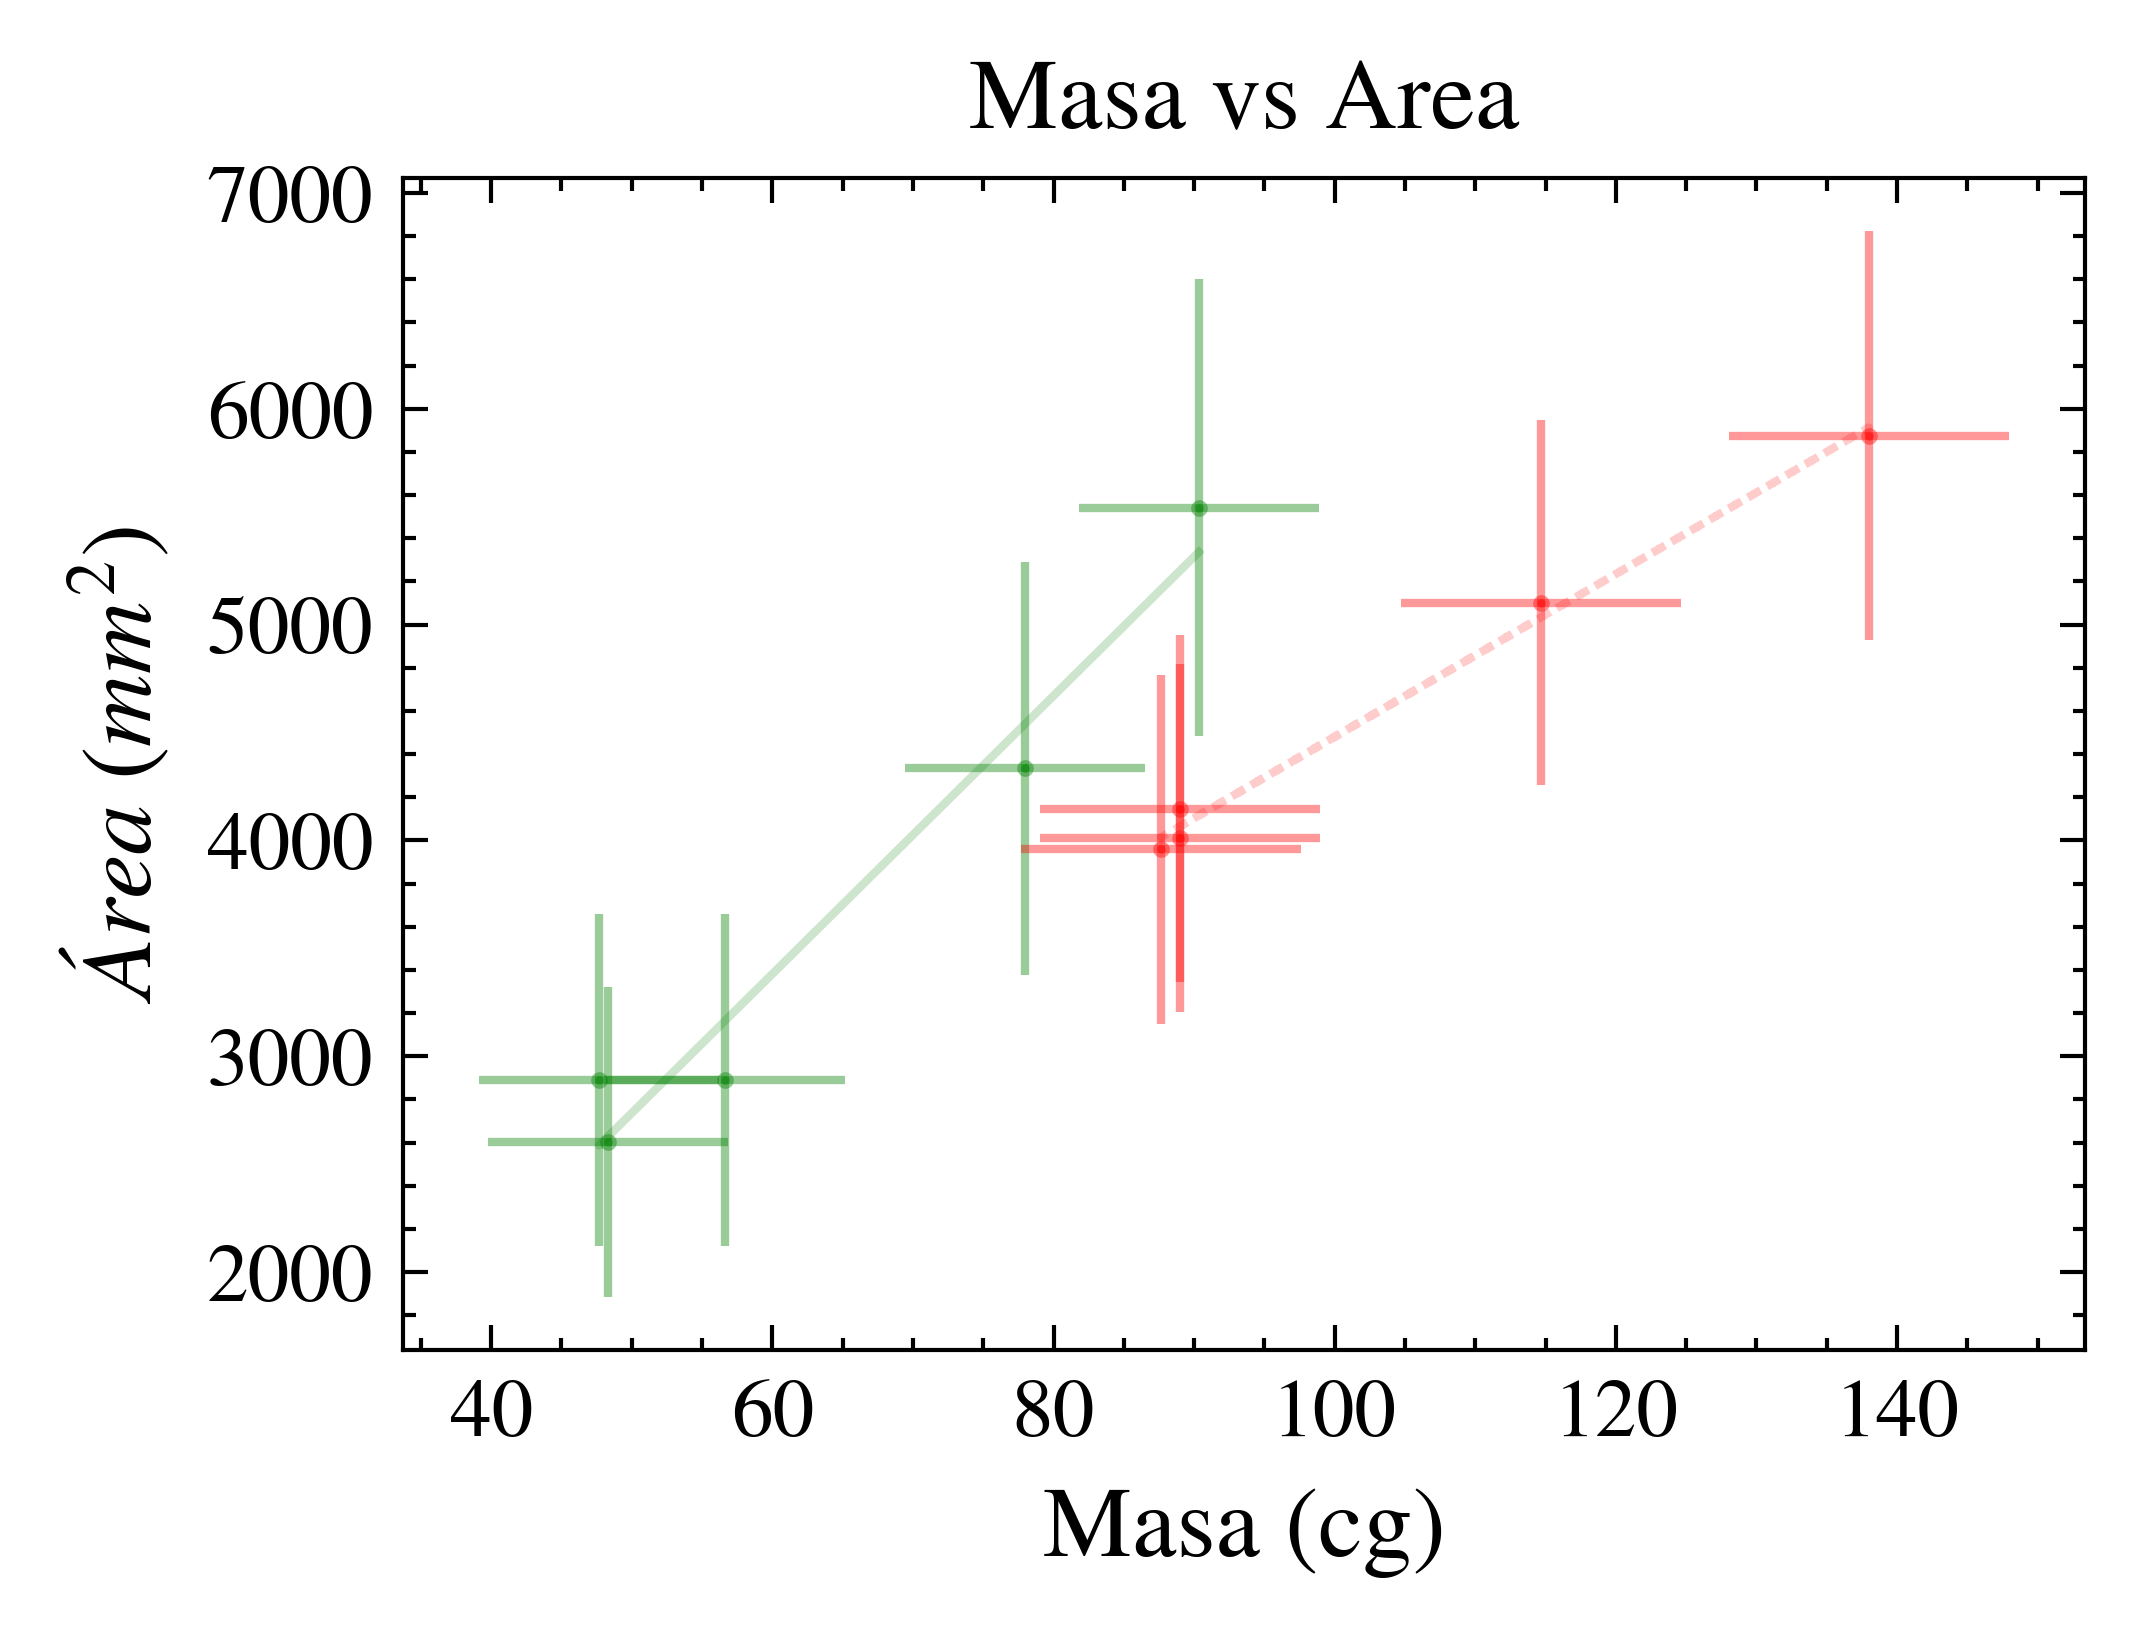

In [297]:
#calculate the standard deviation of the each data classes
#we use the relative error of each measurement
tol = 1 #Absolut error of each sample (width and lenght) (mm)
sistematicWeightError = (3* (0.1**2))**0.5
sub = [[(cA, 'Class A', 'blue'), (cD, 'Class D', 'orange'), (cE, 'Class E', 'purple')], [(cB, 'Class B','green'), (cC, 'Class C', 'red')]]

for clases in sub:
    for clase in clases:
        sigmaArea = [((1/4 * b0 * np.pi)**2 * tol**2 +  (1/4 * a0 * np.pi)**2 * tol**2)**0.5 for a0, b0 in zip(clase[0]['width'], clase[0]['length'])]
        sigmaWeightMeanError = np.std((clase[0]['weight']*100)/(len(clase[0]['weight']*100)**0.5), ddof=1)
        tol = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
        plt.errorbar(clase[0]['weight']*100, clase[0]['area'], yerr=sigmaArea, xerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=0.4)
        regression_coeffs = np.polyfit(clase[0]['weight']*100, clase[0]['area'], 1)
        regression_line = np.polyval(regression_coeffs, clase[0]['weight']*100)
        plt.plot(clase[0]['weight']*100, regression_line, label='Linear Regression', alpha=0.2, color=clase[2])
    plt.xlabel('Masa (cg)')
    plt.ylabel(f'$Área$ $(mm^2)$')
    plt.title('Masa vs Area')
    plt.show()


# sigmaArea = [((1/4 * b0 * np.pi)**2 * tol**2 +  (1/4 * a0 * np.pi)**2 * tol**2)**0.5 for a0, b0 in zip(cA['weight'], cA['length'])]
# sistematicWeightError = (3* (0.1**2))**0.5
# sigmaWeightMeanError = np.std((cA['weight'])/(len(cA['weight'])**0.5), ddof=1)
# tol = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
# plt.errorbar(cA['weight'], cA['area'], yerr=sigmaArea, xerr=tol, fmt='o', label='Class A', ms=3, color='red')
# regression_coeffs = np.polyfit(cA['weight'], cA['area'], 1)
# regression_line = np.polyval(regression_coeffs, cA['weight'])
# plt.plot(cA['weight'], regression_line, label='Linear Regression', color='blue', alpha=0.3)
# # plt.yscale('log')
# # plt.xscale('log')
# plt.xlabel('Peso (g)')
# plt.ylabel('Area (mm^2)')
# plt.legend()
# plt.show()



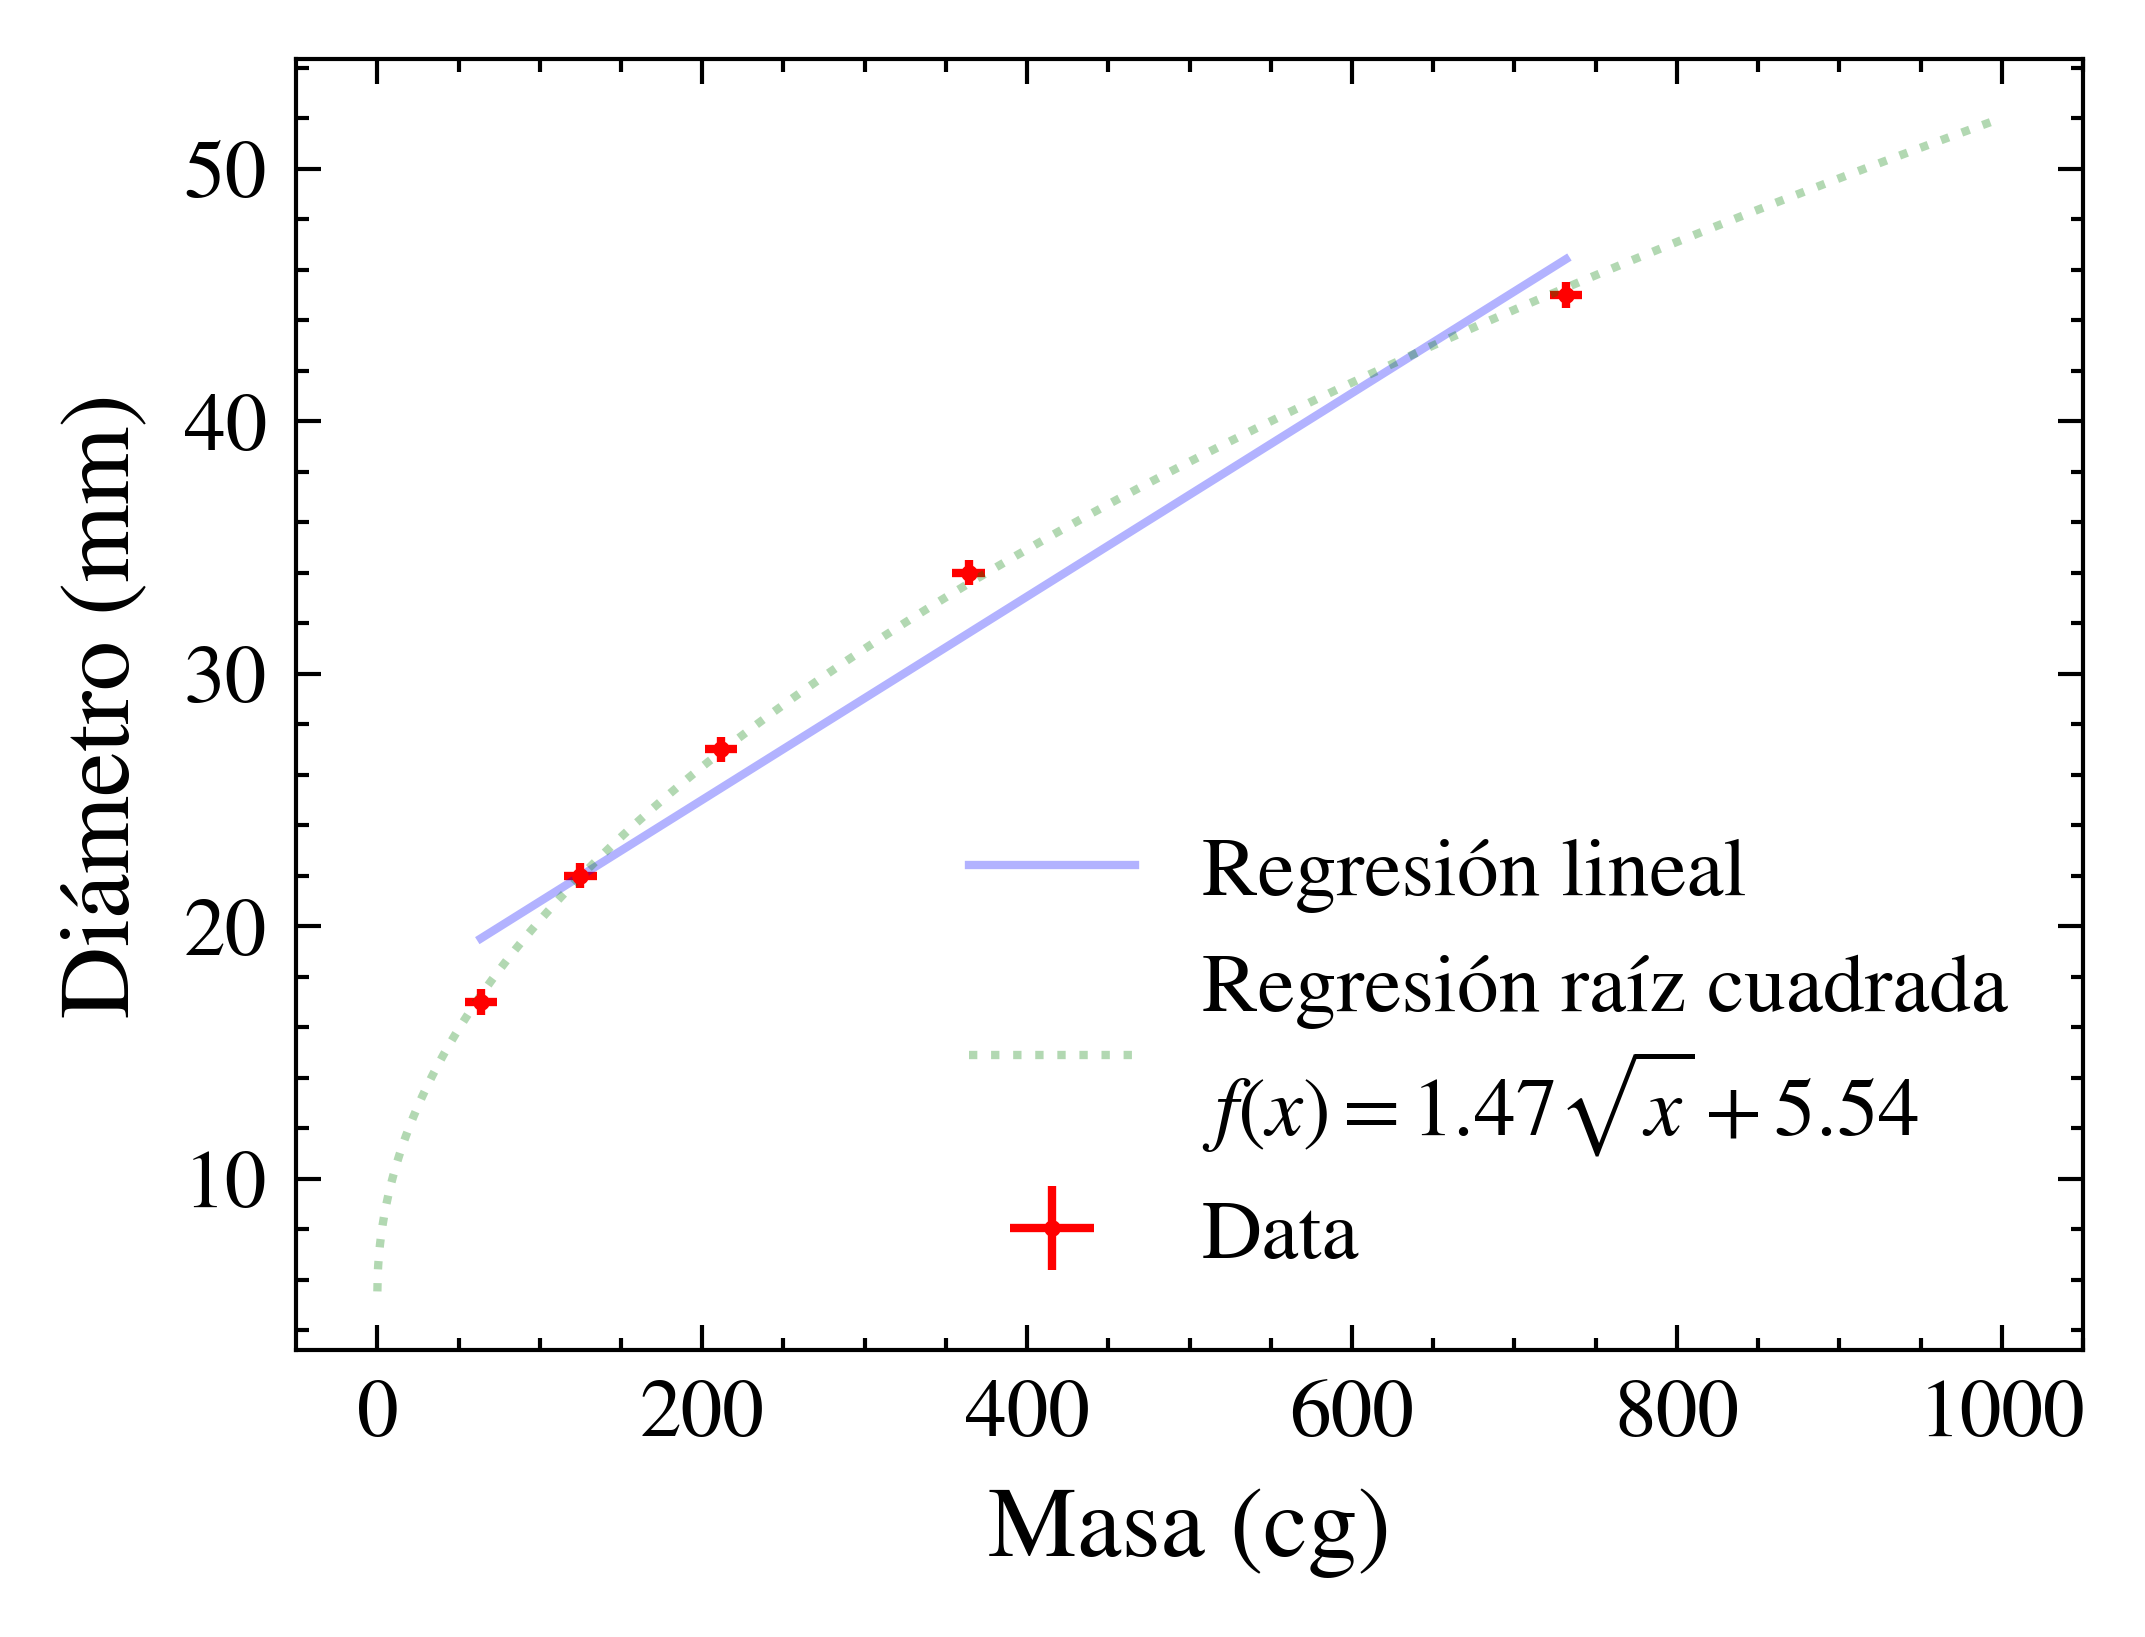

In [308]:
#regresion raiz cuadrada
from scipy.optimize import curve_fit

def square(x, a, b):
    return a*x**0.5 + b

balls = pd.read_csv('balls.csv')

# Linear regression of the diameter with respect to the mass
plt.errorbar(balls['mass']*100, balls['diameter'], xerr=0.1*100, yerr=0.5, fmt='o', label='Data', ms=diameter_points, color='red')
regression_coeffs = np.polyfit(balls['mass']*100, balls['diameter'], 1)
regression_line = np.polyval(regression_coeffs, balls['mass']*100)
plt.plot(balls['mass']*100, regression_line, label='Regresión lineal', color='blue', alpha=0.3)
#regresion sobre coeficientes cuadraticos
# regression_coeffs2 = np.polyfit(balls['mass']*100, balls['diameter'], 2)
# regression_line2 = np.polyval(regression_coeffs2, balls['mass']*100)
# plt.plot(balls['mass']*100, regression_line2, label='Regresión cuadrática', color='green', alpha=0.3)
# plt.title('Masa vs Diámetro')
#regresion raiz cuadrada
popt, pcov = curve_fit(square, balls['mass']*100, balls['diameter'])
xfit = np.linspace(0, 1000, 10000)
plt.plot(xfit, square(xfit, *popt), label='Regresión raíz cuadrada'+f'\n$f(x)={round(popt[0], 2)} \sqrt{{x}}+ {round(popt[1], 2)}$', color='green', alpha=0.3)
# plt.plot(balls['mass']*100, square(balls['mass']*100, *popt), label='Regresión raíz cuadrada'+f'\n$f(x)={round(popt[0], 2)} \sqrt{{x}}+ {round(popt[1], 2)}$', color='green', alpha=0.3)

plt.xlabel('Masa (cg)')
plt.ylabel('Diámetro (mm)')
plt.legend()
plt.show()